<H1>Importing Libraries</H1>

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

<H1>Importing Data</H1>

In [43]:
df = pd.read_csv(r"C:/Users/kritr/Downloads/INTERNSHIP/Orinson/Advertising Budget and Sales.csv")

<H1>Cleaning The Data</H1>

In [45]:
df.set_index(df["Unnamed: 0"],inplace=True)

In [47]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [49]:
df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
Unnamed: 0,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<H1>EDA</H1>

In [51]:
df.isnull().sum()

TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [53]:
df["Newspaper Ad Budget ($)"].duplicated()

Unnamed: 0
1      False
2      False
3      False
4      False
5      False
       ...  
196    False
197    False
198     True
199    False
200     True
Name: Newspaper Ad Budget ($), Length: 200, dtype: bool

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TV Ad Budget ($)         200 non-null    float64
 1   Radio Ad Budget ($)      200 non-null    float64
 2   Newspaper Ad Budget ($)  200 non-null    float64
 3   Sales ($)                200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV Ad Budget ($),200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio Ad Budget ($),200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper Ad Budget ($),200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales ($),200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


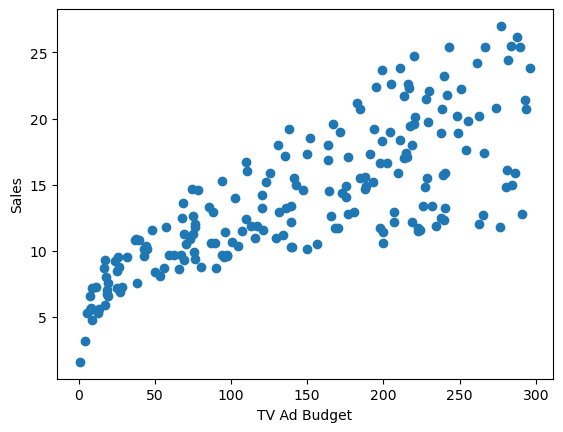

In [59]:
plt.scatter(df["TV Ad Budget ($)"],df["Sales ($)"])
plt.xlabel("TV Ad Budget")
plt.ylabel("Sales")
plt.show();

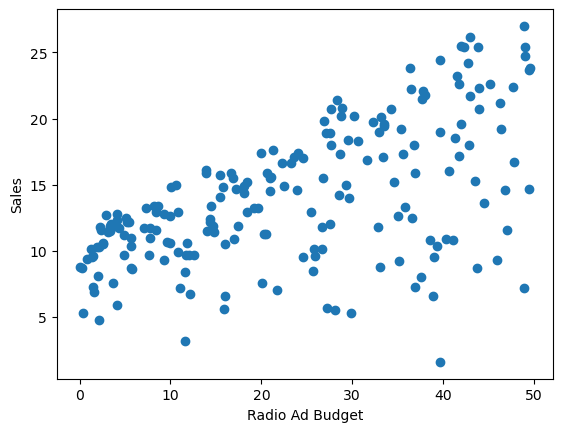

In [61]:
plt.scatter(df["Radio Ad Budget ($)"],df["Sales ($)"])
plt.xlabel("Radio Ad Budget")
plt.ylabel("Sales")
plt.show();

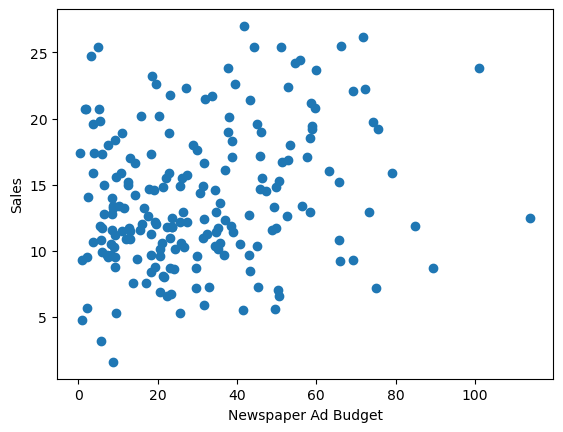

In [63]:
plt.scatter(df["Newspaper Ad Budget ($)"],df["Sales ($)"])
plt.xlabel("Newspaper Ad Budget")
plt.ylabel("Sales")
plt.show();

<H1>Train Test Split</H1>

In [65]:
X_TV = df.drop(columns=["Radio Ad Budget ($)", "Newspaper Ad Budget ($)", "Sales ($)"])
X_Rd = df.drop(columns=["TV Ad Budget ($)", "Newspaper Ad Budget ($)", "Sales ($)"])
X_News = df.drop(columns=["Radio Ad Budget ($)", "TV Ad Budget ($)", "Sales ($)"])
y = df["Sales ($)"]
print(f"Shape of Training set = [{X_TV.shape}, {X_Rd.shape}, {X_News.shape}] and Shape of y = {y.shape}")

Shape of Training set = [(200, 1), (200, 1), (200, 1)] and Shape of y = (200,)


In [67]:
X_TV_train, X_TV_test, y_TV_train, y_TV_test = train_test_split(X_TV,y, test_size=0.3, train_size=0.7,random_state=42)
X_Rd_train, X_Rd_test, y_Rd_train, y_Rd_test = train_test_split(X_Rd,y, test_size=0.3, train_size=0.7,random_state=42)
X_News_train, X_News_test, y_News_train, y_News_test = train_test_split(X_News,y, test_size=0.3, train_size=0.7,random_state=42)
print(f"Shape of Training data: \n\t[[{X_TV_train.shape},{y_TV_train.shape}],\n\t[{X_Rd_train.shape},{y_Rd_train.shape}],\n\t[{X_News_train.shape},{y_News_train.shape}]] \n Shape of Test Data: \n\t[[{X_TV_test.shape},{y_TV_test.shape}],\n\t[{X_Rd_test.shape},{y_Rd_test.shape}],\n\t[{X_News_test.shape},{y_News_test.shape}]]")

Shape of Training data: 
	[[(140, 1),(140,)],
	[(140, 1),(140,)],
	[(140, 1),(140,)]] 
 Shape of Test Data: 
	[[(60, 1),(60,)],
	[(60, 1),(60,)],
	[(60, 1),(60,)]]


<H1>Loading and Training the Model</H1>

In [69]:
model_Tv = LinearRegression(n_jobs=1)
model_Tv.fit(X_TV_train,y_TV_train)

LinearRegression(n_jobs=1)

In [71]:
model_Rd = LinearRegression(n_jobs=1)
model_Rd.fit(X_Rd_train,y_Rd_train)

LinearRegression(n_jobs=1)

In [73]:
model_News = LinearRegression(n_jobs=1)
model_News.fit(X_News_train,y_News_train)

LinearRegression(n_jobs=1)

<H1>Prediction and Accuracy</H1>

In [75]:
predict_TV = model_Tv.predict(X_TV_test)
predict_Rd = model_Rd.predict(X_Rd_test)
predict_News = model_News.predict(X_News_test)

In [77]:
mse_TV = mean_squared_error(y_TV_test,predict_TV)
mae_TV = mean_absolute_error(y_TV_test,predict_TV)
r2_TV = r2_score(y_TV_test,predict_TV)
print(f"The Mean Squared Error = {round(mse_TV,3)}\nThe Mean Absolute Error = {round(mae_TV,3)}\nThe r2 Score = {round(r2_TV,3)}")

The Mean Squared Error = 8.971
The Mean Absolute Error = 2.276
The r2 Score = 0.671


In [79]:
mse_Rd = mean_squared_error(y_Rd_test,predict_Rd)
mae_Rd = mean_absolute_error(y_Rd_test,predict_Rd)
r2_Rd = r2_score(y_Rd_test,predict_Rd)
print(f"The Mean Squared Error = {round(mse_Rd,3)}\nThe Mean Absolute Error = {round(mae_Rd,3)}\nThe r2 Score = {round(r2_Rd,3)}")

The Mean Squared Error = 23.723
The Mean Absolute Error = 3.703
The r2 Score = 0.131


In [81]:
mse_News = mean_squared_error(y_News_test,predict_News)
mae_News = mean_absolute_error(y_News_test,predict_News)
r2_News = r2_score(y_News_test,predict_News)
print(f"The Mean Squared Error = {round(mse_News,3)}\nThe Mean Absolute Error = {round(mae_News,3)}\nThe r2 Score = {round(r2_News,3)}")

The Mean Squared Error = 28.869
The Mean Absolute Error = 4.56
The r2 Score = -0.057


<H1>Model Equation</H1>

In [83]:
model_eq_TV = f"Sales = {round(model_Tv.intercept_,3)} + T.V.*{round(model_Tv.coef_[0],3)}"
model_eq_TV

'Sales = 7.239 + T.V.*0.046'

In [85]:
model_eq_Rd = f"Sales = {round(model_Rd.intercept_,3)} + Radio.*{round(model_Rd.coef_[0],3)}"
model_eq_Rd

'Sales = 9.339 + Radio.*0.219'

In [87]:
model_eq_News = f"Sales = {round(model_News.intercept_,3)} + Newspaper*{round(model_News.coef_[0],3)}"
model_eq_News

'Sales = 12.642 + Newspaper*0.061'

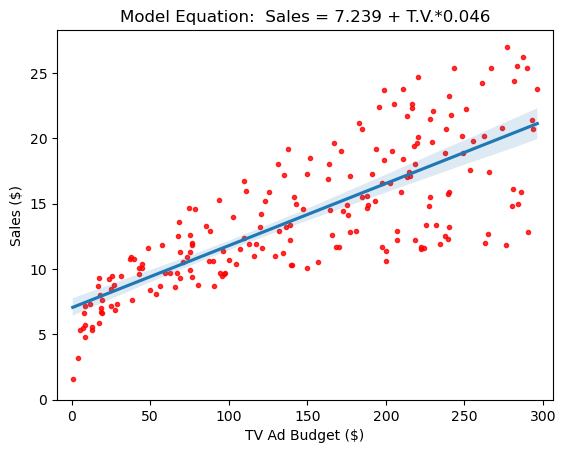

In [89]:
plot = sns.regplot(x=df["TV Ad Budget ($)"], y=df["Sales ($)"],scatter_kws={'color':'r','s':9})
plot.set_title(f"Model Equation:  {model_eq_TV}")
plot.set_ylabel(df.columns[-1])
plot.set_xlabel(df.columns[0])
plt.xlim(df[df.columns[0]].min()-10, df[df.columns[0]].max()+10)
plt.ylim(bottom=0);

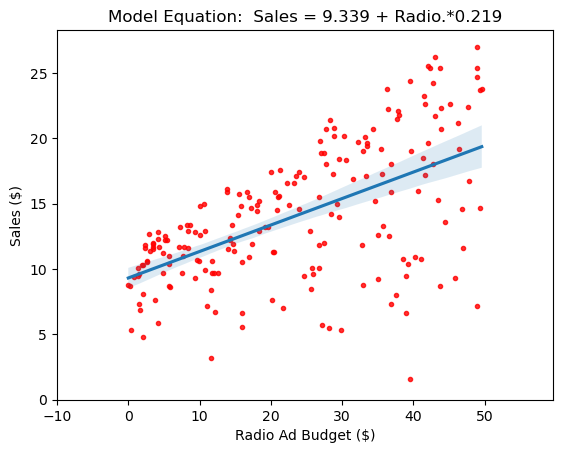

In [91]:
plot = sns.regplot(x=df["Radio Ad Budget ($)"], y=df["Sales ($)"],scatter_kws={'color':'r','s':9})
plot.set_title(f"Model Equation:  {model_eq_Rd}")
plot.set_ylabel(df.columns[-1])
plot.set_xlabel(df.columns[1])
plt.xlim(df[df.columns[1]].min()-10, df[df.columns[1]].max()+10)
plt.ylim(bottom=0);

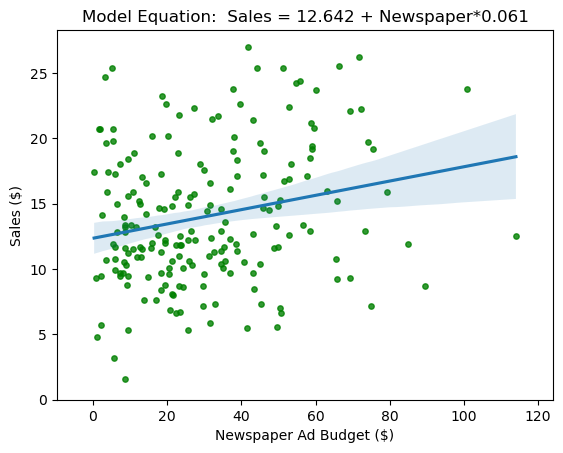

In [95]:
plot = sns.regplot(x=df["Newspaper Ad Budget ($)"], y=df["Sales ($)"],scatter_kws={'color':'g','s':15})
plot.set_title(f"Model Equation:  {model_eq_News}")
plot.set_ylabel(df.columns[-1])
plot.set_xlabel(df.columns[2])
plt.xlim(df[df.columns[2]].min()-10, df[df.columns[2]].max()+10)
plt.ylim(bottom=0);